In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
data = pd.read_csv('west-bengal.csv')
data.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Asansol,19,WEST BENGAL,9,564491,293748,270743,56014,29363,26651,...,194617,922,908,84.82,89.52,79.73,"23.6739452,86.9523954",65625,40231,25394
1,Ashoknagar Kalyangarh,19,WEST BENGAL,11,123906,62554,61352,8885,4564,4321,...,50939,981,947,92.45,95.53,89.32,"22.84039,88.6241351",11992,7093,4899
2,Baharampur,19,WEST BENGAL,7,195363,100431,94932,13228,6741,6487,...,77910,945,962,90.29,92.36,88.09,"24.0988265,88.2679264",32154,19679,12475
3,Baidyabati,19,WEST BENGAL,12,121081,62550,58531,8154,4164,3990,...,47373,936,958,89.08,91.15,86.86,"22.795783,88.3190717",17224,10311,6913
4,Bally,19,WEST BENGAL,15,291972,156734,135238,31859,14583,17276,...,97394,863,1185,83.39,84.07,82.56,"22.6500518,88.3423199",36100,22170,13930


In [14]:
wb = data[['population_total','literates_female']]
wb.head()

,population_total,literates_female
0,564491,194617
1,123906,50939
2,195363,77910
3,121081,47373
4,291972,97394


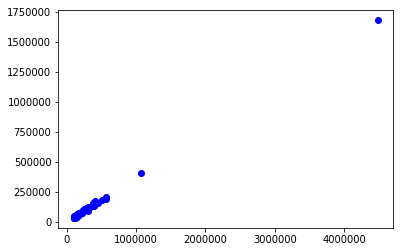

In [4]:
plt.scatter(data.population_total,data.literates_female,color='blue')
plt.show()

c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


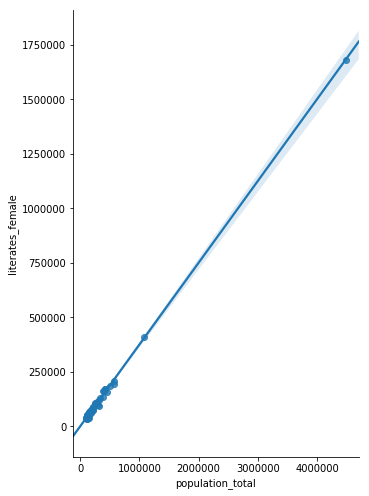

In [5]:
sns.pairplot(data,x_vars='population_total',y_vars='literates_female',size=7,aspect=0.7,kind='reg')

In [6]:
reg = linear_model.LinearRegression()

In [7]:
reg.fit(wb[['population_total']],wb.literates_female)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
p = reg.predict([[3300000]])
p

array([1237409.87011302])

In [9]:
print(reg.coef_)
print(reg.intercept_)

[0.3749207]
171.5492059096141


In [10]:
df = pd.DataFrame({
    'population_total':[293501,163000,288908,389008,122000,485300,353400,565600]
})
df

,population_total
0,293501
1,163000
2,288908
3,389008
4,122000
5,485300
6,353400
7,565600


In [11]:
p = reg.predict(df)
p

array([110211.15054668,  61283.62384465, 108489.1397564 , 146018.70215725,
        45911.87500914, 182120.56651992, 132668.52575396, 212226.69899532])

In [12]:
df['literates_female']=p
df

,population_total,literates_female
0,293501,110211.150547
1,163000,61283.623845
2,288908,108489.139756
3,389008,146018.702157
4,122000,45911.875009
5,485300,182120.566520
6,353400,132668.525754
7,565600,212226.698995


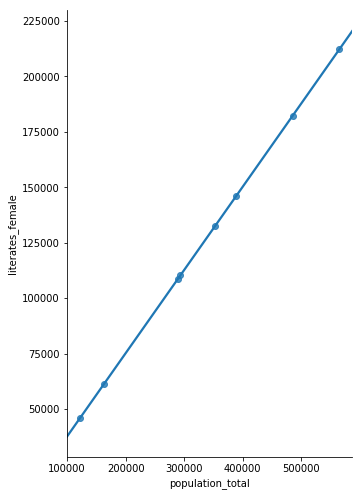

In [13]:
sns.pairplot(df,x_vars='population_total',y_vars='literates_female',height=7,aspect=0.7,kind='reg')